#  Prosper Loans DB.  Data Analysis and Visualisation.

Started: 28/04/2019  
Last Update: 13/05/2018  
Eudald Escribà     [GitHub](https://github.com/eudald-escriba)

<div id='top' /> 

***Table of contents***


1. [Introduction](#id1)

2. [Library import](#id2)

3. [Data Wrangling](#id3)

  *  [Drop irrelevant columns](#id31)
  
4. [Univariate Exploration](#id4)

  * [Number of listings in each Borrower State](#id41)
  * [Number of Listings according to Term to return](#id42) 
  * [Number of Listings per year](#id43)       
  * [Number of Listings per month](#id44) 
  
  
5. [Bivariate Exploration](#id5)

      * [Prosper Principal Borrowed vs Income range](#id51)
      * [Prosper Principal Borrowed vs Delinquencies in the Last 7 Years](#id52)
      
      
6. [Multivariate Exploration](#id6)

 * [Evolution of the Borrowers Rate every Year according to the Term to retun the loan](#id61)

<div id='id1' />

### **1. Introduction**


## Investigation Overview

The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.

## Dataset Overview

This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.
As well, there is a dictionary with all the terms used in this context.
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


<div id='id2' />

### **2. Library import**

In [1]:
# import all packages and set plots to be embedded inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<div id='id3' />

### **3. Data Wrangling** 


> First, data is loaded and then a high level observation is performed. Low level Assessment and Cleaning are out of the range of this project.

In [2]:
# load data
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print('-------DATA SHAPE-----')
print(loan_data.shape)


-------DATA SHAPE-----
(113937, 81)


In [4]:
#data types and null prospection
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
#general descriptive statistics 
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# print 5 first rows
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> At this point it is necessary to consider if all 81 columns are needed and , a part from that , how should we deal with the  null values and the time objects.


<div id='id31' />


>**3.1 Drop irrelevant columns**

There ara multiple criteria to rid of some columns but the most obvious ones are the following

In [7]:
# Drop unnecessary columns
loan_data.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber", 
         "MemberKey"], axis=1, inplace=True)

In [8]:
print(loan_data.shape)

(113937, 76)


<div id='id4' />

### **4. Univariate Exploration** 



In [9]:
print(len(loan_data['BorrowerState']))

113937


In [10]:
loan_data['BorrowerState'].describe()

count     108422
unique        51
top           CA
freq       14717
Name: BorrowerState, dtype: object

In [11]:
len(loan_data['BorrowerState'])-loan_data['BorrowerState'].describe()[0]

5515

In [12]:
loan_data['BorrowerState'].isnull().sum()

5515

In [13]:
#check the values of the column 
loan_data['BorrowerState'].head(10)

0    CO
1    CO
2    GA
3    GA
4    MN
5    NM
6    KS
7    CA
8    IL
9    IL
Name: BorrowerState, dtype: object

In [14]:
#count the values because is categorical
loan_data['BorrowerState'].value_counts().head(15)

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
Name: BorrowerState, dtype: int64

<div id='id41' />

#### **4.1 Number of listings in each Borrower State** 

#### **Which are the States where more loans have been counted?** 

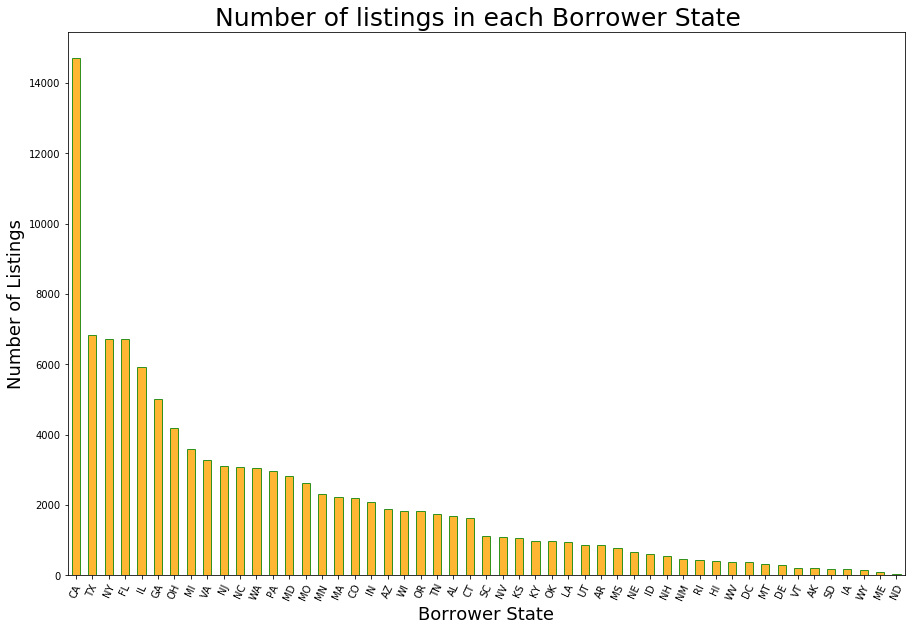

In [15]:

plt.figure(figsize=[15, 10])
loan_data['BorrowerState'].value_counts().plot(kind='bar', color='orange',alpha=0.8,edgecolor='green')
plt.title('Number of listings in each Borrower State  ', fontsize=25);
plt.xlabel('Borrower State', fontsize=18, color='black' );
plt.xticks(rotation=65);
plt.ylabel('Number of Listings', fontsize=18, color='black');

>The highest listing counts in CA, TX, NY, FL and the least in WY, ME, ND. This appear in concordance with the population of the states. 

<div id='id42' />

#### **4.2 Number of Listings according to Term to return ** 

#### **Which are the most typicall term to return the money?** 

In [16]:
sizes = loan_data['Term'].value_counts()
sizes

36    87778
60    24545
12     1614
Name: Term, dtype: int64

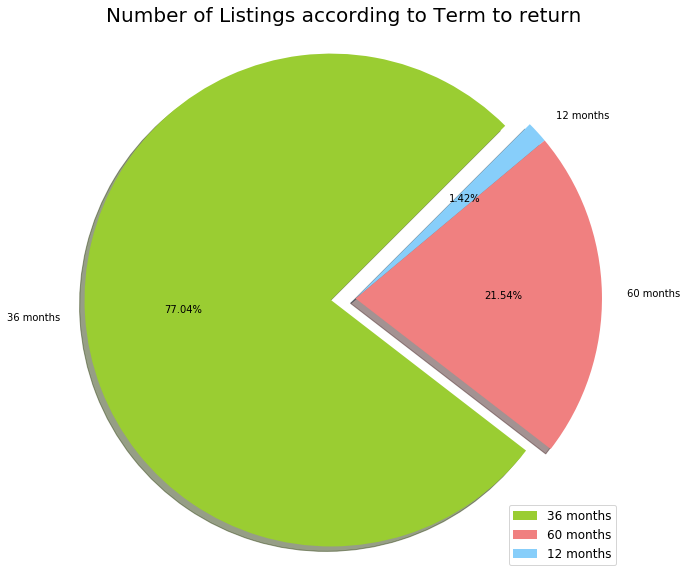

In [17]:


plt.figure(figsize=[10,10])
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '36 months', '60 months', '12 months'
sizes = loan_data['Term'].value_counts()
colors=['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0) 


plt.pie(sizes, explode=explode,colors=colors,  labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend( labels,fontsize=12, loc=4);
plt.title('Number of Listings according to Term to return', fontsize=20);
plt.show()



> The most frequent accepted return term is 36 months. Three out of four loans are returned in 3 years.

<div id='id43' />

#### **4.3 Number of Listings per year ** 

#### **Which is the evolution of the number of listings per year?** 

In [18]:
loan_data['ListingCreationDate'] = pd.to_datetime(loan_data['ListingCreationDate'])

In [19]:
loan_data['ListingCreationDate'].sample(4)

113532   2013-03-18 11:34:54.467
47356    2011-11-26 14:02:27.153
20757    2009-12-01 12:47:50.423
110528   2008-05-30 21:03:25.473
Name: ListingCreationDate, dtype: datetime64[ns]

In [20]:
loan_data["year"] = loan_data["ListingCreationDate"].dt.year

In [21]:
loan_data["year"].value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: year, dtype: int64

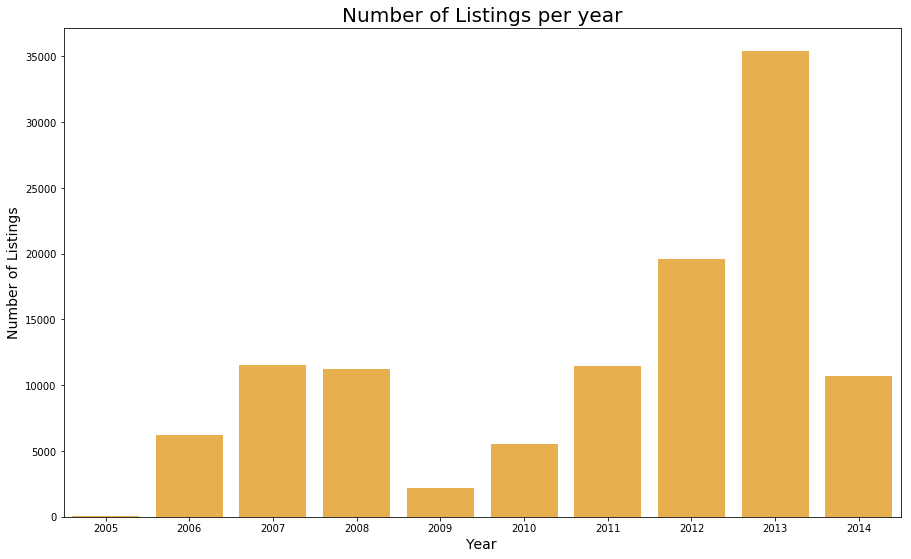

In [22]:
plt.figure(figsize=[15,9])
sb.countplot(x="year", data=loan_data, color='orange', alpha=0.8)
plt.title('Number of Listings per year',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Listings',fontsize=14)
plt.show()

> The data shows how the number of loans plummets in 2009 and progressively (perhaps due to the policies put in place after the crisis) begins to rise until reaching a maximum point in 2013.

<div id='id44' />

#### **4.4 Number of Listings per month ** 

#### **Is thera a month when loans count is higher? And lower?** 

In [23]:
loan_data['month'] = loan_data["ListingCreationDate"].dt.month.apply(lambda x: calendar.month_name[x])

In [24]:
loan_data['month'].value_counts()

January      11214
October      10539
December     10320
February     10124
September    10074
November      9952
July          9506
August        9202
June          8672
May           8641
March         8032
April         7661
Name: month, dtype: int64

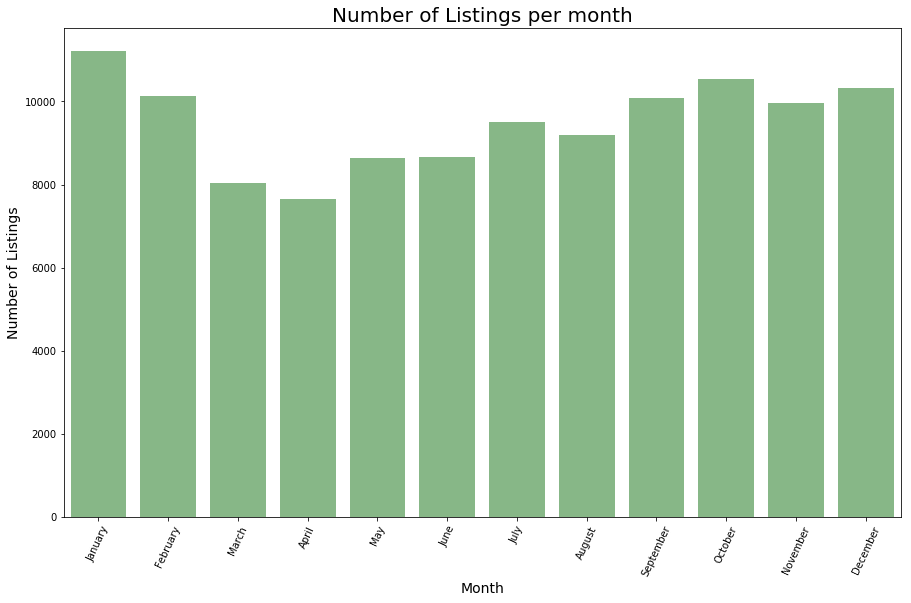

In [25]:
month_order=['January', 'February', 'March' ,'April','May','June','July','August','September','October',      
'November', 'December']
plt.figure(figsize=[15,9])
sb.countplot(x="month", data=loan_data, color='green', order=month_order, alpha=0.5);
plt.title('Number of Listings per month',fontsize=20);

plt.xlabel('Month',fontsize=14);
plt.ylabel('Number of Listings',fontsize=14);
plt.xticks(rotation=65);
plt.show()

> Data show that around May start an ascending period until January when start declining until May.

<div id='id5' />

### **5. Bivariate Exploration** 



<div id='id51' />

#### **5.1 Prosper Principal Borrowed vs Income range  ** 

#### **Is there a difference in the Principal Borrowed depending on the Income Range?** 

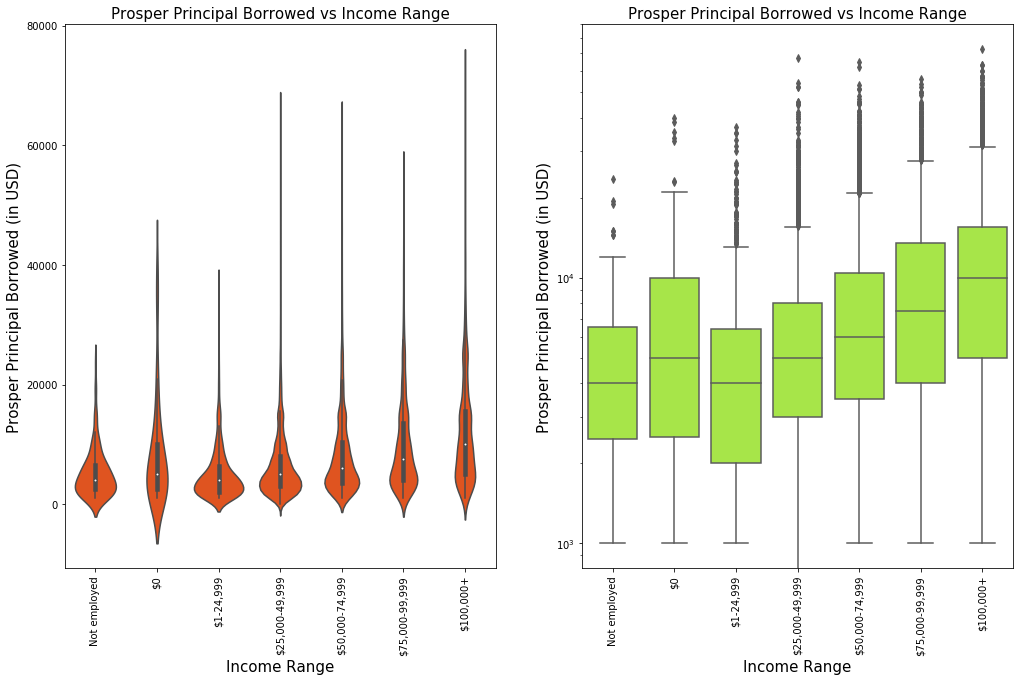

In [26]:
new_order=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

figure=plt.figure(figsize=[17,10]);


plt.subplot(1, 2, 1)
sb.violinplot(data=loan_data, x='IncomeRange', y='ProsperPrincipalBorrowed' , color='orangered', boxprops=dict(alpha=.3), order= new_order);
plt.xticks(rotation=90);

plt.ylabel('Prosper Principal Borrowed (in USD)', fontsize=15)
plt.xlabel('Income Range', fontsize=15)
plt.title('Prosper Principal Borrowed vs Income Range', fontsize=15);
plt.subplot(1, 2, 2)

# scale the y axis with log to analyze more accurately
sb.boxplot(data=loan_data, x='IncomeRange', y='ProsperPrincipalBorrowed', color='greenyellow', order= new_order);
plt.yscale('log')

plt.xticks(rotation=90);
plt.ylabel('Prosper Principal Borrowed (in USD)', fontsize=15)
plt.xlabel('Income Range', fontsize=15)
plt.title('Prosper Principal Borrowed vs Income Range', fontsize=15);

> The insights from the both graphs show how the more the income range the more the principal amount borrowed. The 0 dollar income category doesn't follow the rule. Violin plot show as well how the more the income range the more the range of principal.


<div id='id52' />

#### **5.2 Prosper Principal Borrowed vs Delinquencies in the Last 7 Years  ** 

#### **Can people with deliquences borrow money?** 

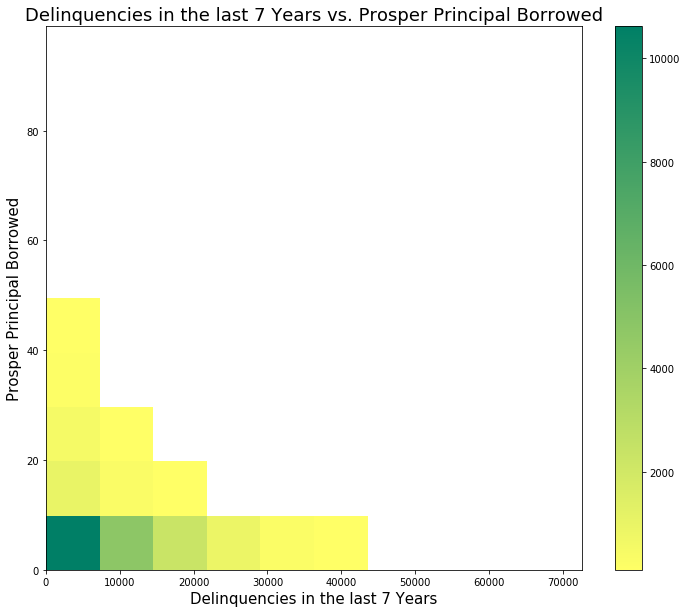

In [27]:
#style
figure=plt.figure(figsize=[12,10]);
plt.xlabel('Delinquencies in the last 7 Years', fontsize=15)
plt.ylabel('Prosper Principal Borrowed', fontsize=15)
plt.title('Delinquencies in the last 7 Years vs. Prosper Principal Borrowed', fontsize=18)


# remove the null entries
loan_data_sub = loan_data.loc[loan_data.DelinquenciesLast7Years.notnull()]
loan_data_sub2 = loan_data_sub.loc[loan_data.ProsperPrincipalBorrowed.notnull()]


# plots the hist2d graph 
plt.hist2d(data=loan_data_sub2, x='ProsperPrincipalBorrowed', y='DelinquenciesLast7Years', cmin=100, cmap='summer_r');
plt.colorbar()





>The graph allows us to see that the customers with the highest number of deliquesions in the last 7 years correspond to clients with a low principal. It can also be seen that for a medium/high number of delicuences there is no loan. The graph show that high loans are correlated to a low number of delicuences.

<div id='id6' />

### **6. Multivariate Exploration** 



<div id='id61' />

#### **6.1 Evolution of the Borrowers Rate every Year according to the Ter to retun the loan  ** 

#### **Is the Borrower Rate time evolution related to the term to return the money?** 

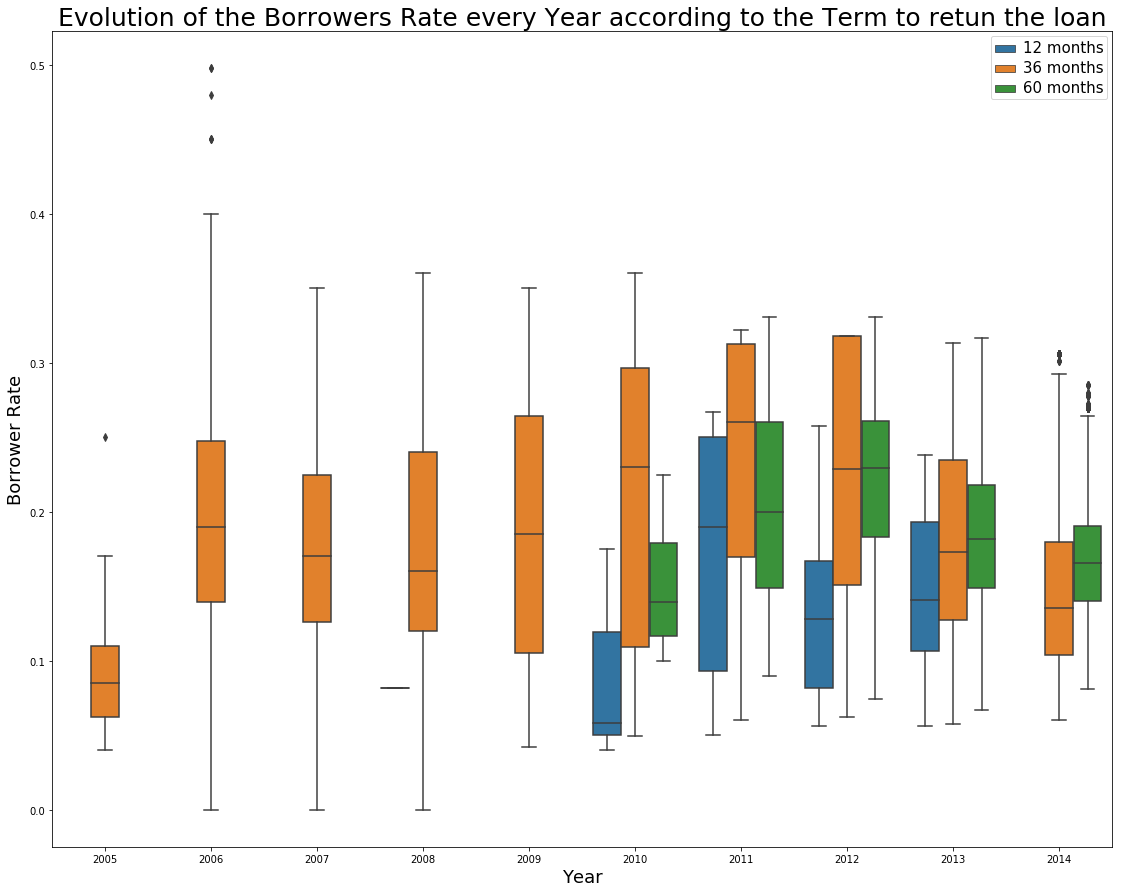

In [28]:
figure=plt.figure(figsize=[19,15]);

plot = sb.boxplot(x='year', y='BorrowerRate' , data=loan_data, hue='Term',)

leg = plot.get_legend()
leg.set_title("")
labs = leg.texts
labs[0].set_text('12 months')
labs[1].set_text('36 months')
labs[2].set_text('60 months')
labs[0].set_fontsize(15)
labs[1].set_fontsize(15)
labs[2].set_fontsize(15)
plot.axes.xaxis.label.set_fontsize(18)
plot.axes.xaxis.label.set_text('Year')
plot.axes.yaxis.label.set_fontsize(18)
plot.axes.yaxis.label.set_text('Borrower Rate')
plt.title('Evolution of the Borrowers Rate every Year according to the Term to retun the loan', fontsize=25);

>The plot show that before 2009 the term were 36 months and from 2009 on appear two new terms: 12 and 36 months. As of 2010, it can be seen how the evolution of the Borrower Rate for 36 months goes up until 2011 and falls again. 
This is exactly the same pattern that presents the term of 60 months. Where it is not so easy to appreciate a clear movement is the 12 month modality that appears more unstable since it oscillates during the period of study. 
It should also be noted how the presence of the 12-month term is especially shown in a period in which perhaps the fear of default was imposed. A fear that would have been reinforced combining loans to 12 months at lower interest with 36 or 60 months at higherinterest.